In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings
import re
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df.shape

(9134, 24)

In [9]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
import numpy as np

numericals = df.select_dtypes(include=np.number).columns

bounds = {}
for column in numericals:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    bounds[column] = (lower_bound, upper_bound)

filtered_df = df.copy()
for column, (lower_bound, upper_bound) in bounds.items():
    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]


In [13]:
filtered_df.shape

(5911, 24)

In [ ]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler

continuous_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
                      'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']

scaler = MinMaxScaler()

df[continuous_columns] = scaler.fit_transform(df[continuous_columns])


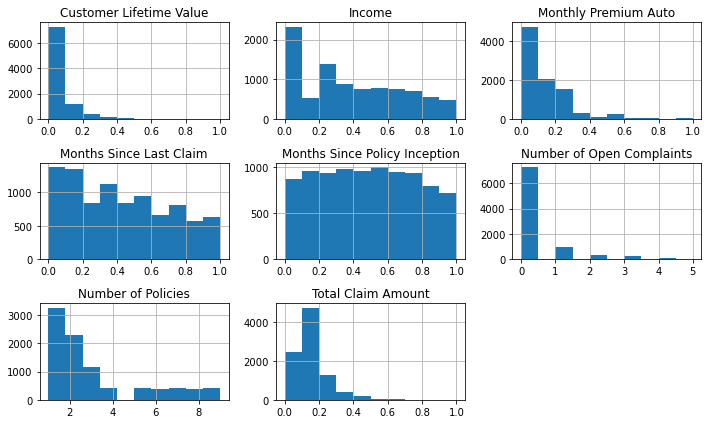

In [16]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [17]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].astype(str)
df['Number of Policies'] = df['Number of Policies'].astype(str)


In [19]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints         object
Number of Policies                object
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [21]:

df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

df['Day'] = df['Effective To Date'].dt.day
df['Month'] = df['Effective To Date'].dt.month
df['Year'] = df['Effective To Date'].dt.year

df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)


df = df.drop('Effective To Date', axis=1)

In [22]:
df.dtypes

Customer                           int64
State                              int64
Customer Lifetime Value          float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Income                           float64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Renew Offer Type                   int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class                      int64
Vehicle Size                       int64
Day                                int64
Month           